In [276]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
%matplotlib inline
from ydata_profiling import ProfileReport

In [277]:
# checking the poth

print(os.getcwd())

C:\Users\seglu\AMDARI


In [278]:
#Loading our Data
def load_dataset(file_path):
    if not os.path.exists(file_path):
        raise FileNotFoundError(f'this {file_path} cant be found')
    

    return pd.read_csv(file_path)

df = load_dataset(r'C:\Users\seglu\AMDARI\Dataset_ecommerce.csv')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 8:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 8:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 8:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 8:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 8:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [279]:
#Profiling our data for for better and accurate exporatory Analysis

# profile = ProfileReport(df, title ='Ecommerce Report' , explorative = True)
# profile


In [280]:
#converting the invoiceDate dtype to datetimes datatype

df["invoiceDate"] = pd.to_datetime(df["InvoiceDate"] , errors = 'coerce')

In [281]:
#checking the data information of non null values and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   InvoiceDate  541909 non-null  object        
 2   CustomerID   406829 non-null  float64       
 3   StockCode    541909 non-null  object        
 4   Description  541909 non-null  object        
 5   Quantity     541909 non-null  int64         
 6   UnitPrice    541909 non-null  float64       
 7   Country      541909 non-null  object        
 8   invoiceDate  541909 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 37.2+ MB


In [282]:
# dropping a null value in the customerID column
df= df.dropna(subset =['CustomerID'])

In [283]:
#reconfirming the null values and if they still exists in the column then sum them up
df.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
invoiceDate    0
dtype: int64

In [284]:
df.columns

Index(['InvoiceNo', 'InvoiceDate', 'CustomerID', 'StockCode', 'Description',
       'Quantity', 'UnitPrice', 'Country', 'invoiceDate'],
      dtype='object')

In [285]:
# checking the top five row in the dataset
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,invoiceDate
0,536365,2010-12-01 8:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01 08:26:00
1,536365,2010-12-01 8:26:00,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01 08:26:00
2,536365,2010-12-01 8:26:00,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01 08:26:00
3,536365,2010-12-01 8:26:00,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01 08:26:00
4,536365,2010-12-01 8:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01 08:26:00


In [286]:
#coverting the float value in the customerId to str/object

df['CustomerID'] = df["CustomerID"].astype(int).astype(str)

C:\Users\seglu\AppData\Local\Temp\ipykernel_25632\4224157589.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['CustomerID'] = df["CustomerID"].astype(int).astype(str)


In [287]:
# checking the data information again if it has really convert to object
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   InvoiceDate  406829 non-null  object        
 2   CustomerID   406829 non-null  object        
 3   StockCode    406829 non-null  object        
 4   Description  406829 non-null  object        
 5   Quantity     406829 non-null  int64         
 6   UnitPrice    406829 non-null  float64       
 7   Country      406829 non-null  object        
 8   invoiceDate  406829 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(1), object(6)
memory usage: 31.0+ MB


In [288]:
cat_col = pd.DataFrame({
    "Most_Frequent": df.select_dtypes(include='object').mode().iloc[0],
    "Unique_Counts": df.select_dtypes(include='object').nunique()
})

cat_col

,Most_Frequent,Unique_Counts
InvoiceNo,576339,22190
InvoiceDate,2011-11-14 15:27:00,20460
CustomerID,17841,4372
StockCode,SC2014,9000
Description,Jewelry,10
Country,Nigeria,28


In [289]:
# extracting the uniques number from customerID column and transaction column
num_customer = df. CustomerID.nunique()
num_transaction = df.InvoiceNo.nunique()
num_product = df.StockCode.nunique()

In [290]:
print(f"numbers of unique customerID :", {num_customer})
print(f"numbers of unique num_transaction :", {num_transaction})
print(f"numbers of unique num_product  :", {num_product})

numbers of unique customerID : {4372}
numbers of unique num_transaction : {22190}
numbers of unique num_product  : {9000}


In [291]:
#extracting value from the stockcode
num_product1 = df["StockCode"].value_counts().nunique()
num_product1

53

In [292]:
#evaluating the date rage 
date_rage = (df['InvoiceDate'].min(), df["InvoiceDate"].max())
print(f"transaction period : {date_rage[0]},{date_rage[1]}")

transaction period : 2010-12-01 10:03:00,2011-12-09 9:57:00


In [293]:
#evaluating the date rage 

date_range = pd.DataFrame({
    "min_transactionDate": [df['InvoiceDate'].min()],
    "max_transactionDate":[df['InvoiceDate'].max()]
})
date_range

,min_transactionDate,max_transactionDate
0,2010-12-01 10:03:00,2011-12-09 9:57:00


In [294]:
df.describe()

,Quantity,UnitPrice,invoiceDate
count,406829.000000,406829.000000,406829
mean,50.478471,50.477654,2011-07-10 16:30:57.879207424
min,1.000000,1.000000,2010-12-01 08:26:00
25%,25.000000,25.710000,2011-04-06 15:02:00
50%,50.000000,50.430000,2011-07-31 11:48:00
75%,75.000000,75.170000,2011-10-20 13:06:00
max,100.000000,100.000000,2011-12-09 12:50:00
std,28.872921,28.573075,NaN


In [295]:
# Get rows where the column value is zero or negative
nagetive_row = pd.DataFrame({
    "Neg_Quantity_Row" :[df['Quantity'] <= 0],
    "Neg_UnitPrice_Row":[ df['UnitPrice'] <= 0]
})

new =nagetive_row.sum()
new


Neg_Quantity_Row     0         False
1         False
2         Fals...
Neg_UnitPrice_Row    0         False
1         False
2         Fals...
dtype: object

In [296]:
#grouping top 5 countries with their customerID
top_country = df.groupby('Country')['CustomerID'].nunique().sort_values(ascending=False).head()
top_country

Country
Mozambique      3072
Benin           3054
Togo            3053
Nigeria         3051
Burkina Faso    3049
Name: CustomerID, dtype: int64

In [297]:
std = top_country.std()
std

9.257429448826493

C:\Users\seglu\AppData\Local\Temp\ipykernel_25632\301073338.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_country.values,y=top_country.index, palette ='viridis')


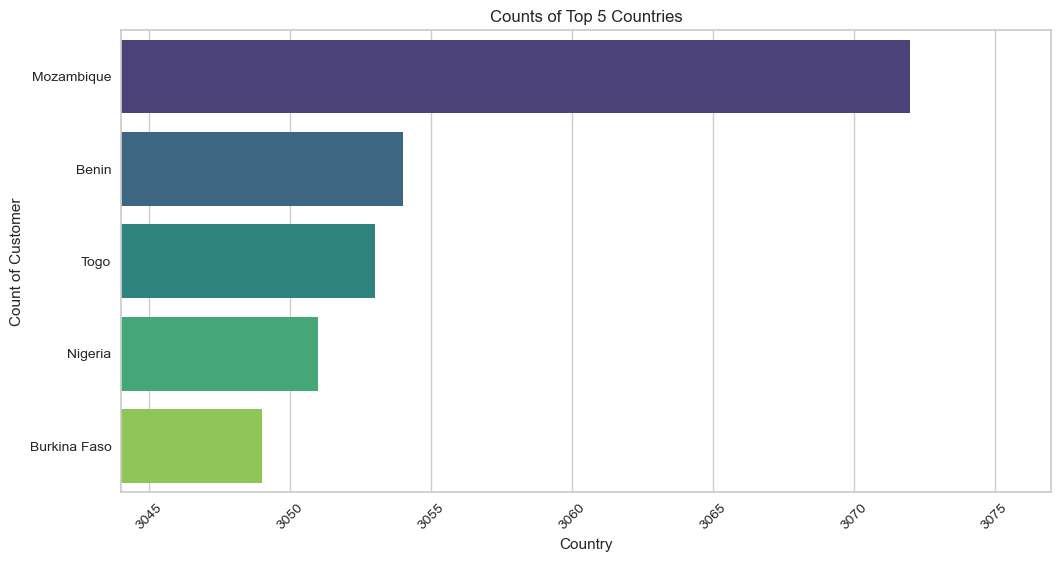

In [298]:
# ploting top_country on barplot for range Visualisation

plt.figure(figsize=(12,6))


sns.barplot(x=top_country.values,y=top_country.index, palette ='viridis')
plt.xlim(min(top_country)-5 ,max(top_country) +5)
plt.xlabel('Country')
plt.ylabel('Count of Customer')
plt.title('Counts of Top 5 Countries')
plt.xticks(rotation=45)  # rotate x labels if needed
plt.show()

In [299]:
#Viewing top 5 row in the dataset
df.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,invoiceDate
0,536365,2010-12-01 8:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01 08:26:00
1,536365,2010-12-01 8:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01 08:26:00
2,536365,2010-12-01 8:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01 08:26:00
3,536365,2010-12-01 8:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01 08:26:00
4,536365,2010-12-01 8:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01 08:26:00


In [300]:
#extract month from the InvoiceDate

df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"] , errors = 'coerce')

df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")
print("Unparsed dates:", df['InvoiceMonth'].isna().sum())





Unparsed dates: 0


C:\Users\seglu\AppData\Local\Temp\ipykernel_25632\315901698.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"] , errors = 'coerce')
C:\Users\seglu\AppData\Local\Temp\ipykernel_25632\315901698.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceMonth'] = df['InvoiceDate'].dt.to_period("M")


In [301]:
# creating column for revenue by multiplying the Quantity column by the UnitPrice column

df['Revenue'] = df["Quantity"] * df["UnitPrice"]

# grouping the invoiceMonth column by the revenue
monthly_sales = df.groupby(df["InvoiceMonth"])['Revenue'].sum().reset_index()
monthly_sales 

C:\Users\seglu\AppData\Local\Temp\ipykernel_25632\3116106701.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Revenue'] = df["Quantity"] * df["UnitPrice"]


,InvoiceMonth,Revenue
0,2010-12,6.792367e+07
1,2011-01,5.582933e+07
2,2011-02,5.208536e+07
3,2011-03,7.137210e+07
4,2011-04,5.914003e+07
5,2011-05,7.434151e+07
6,2011-06,7.109639e+07
7,2011-07,7.040789e+07
8,2011-08,6.994326e+07
9,2011-09,1.036281e+08


In [302]:
#converting the invoivemonth column to object
monthly_sales["InvoiceMonth"] = monthly_sales["InvoiceMonth"].astype(str)

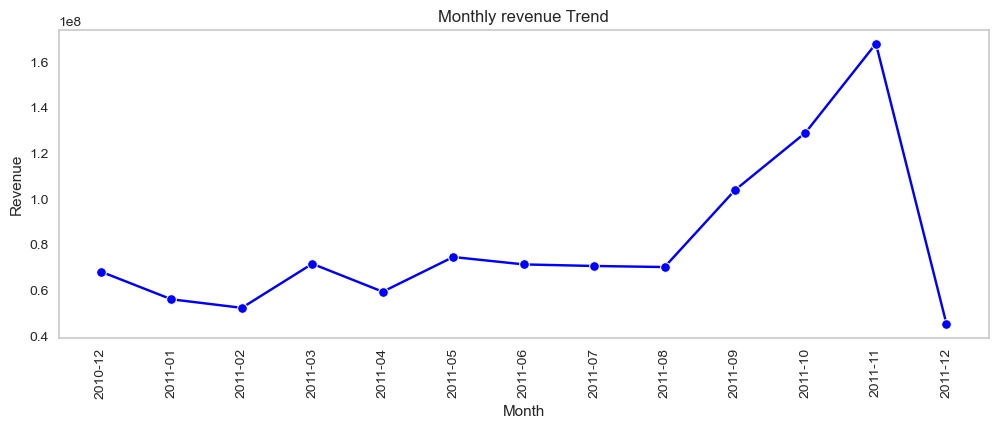

In [303]:
#ploting the trend and flow between InvoiceMonth and Revenue

plt.figure(figsize=(12,4))
sns.lineplot(x = 'InvoiceMonth' ,y ='Revenue' , data = monthly_sales , marker = "o", color = 'blue')
plt.title('Monthly revenue Trend')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [304]:

#grouping the CustormerId  by the invoice month
cohort_data = df.groupby('CustomerID')['InvoiceMonth'].min()

In [305]:
#renaming cohort_data to cohortMonth
cohort_data.name = "cohortMonth"

In [306]:
#cohort_data must be a DataFrame with a CustomerID column and merging it with the dataset
df= df.merge(cohort_data, on ='CustomerID')
df

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,invoiceDate,InvoiceMonth,Revenue,cohortMonth
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01 08:26:00,2010-12,664.95,2010-12
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01 08:26:00,2010-12,1862.95,2010-12
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01 08:26:00,2010-12,4796.22,2010-12
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01 08:26:00,2010-12,370.95,2010-12
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01 08:26:00,2010-12,1941.50,2010-12
...,...,...,...,...,...,...,...,...,...,...,...,...
406824,581587,2011-12-09 12:50:00,12680,SC5440,Furniture,25,36.53,Mozambique,2011-12-09 12:50:00,2011-12,913.25,2011-08
406825,581587,2011-12-09 12:50:00,12680,SC3576,Cloths,94,90.65,Tunisia,2011-12-09 12:50:00,2011-12,8521.10,2011-08
406826,581587,2011-12-09 12:50:00,12680,SC5283,Furniture,14,40.07,Somalia,2011-12-09 12:50:00,2011-12,560.98,2011-08
406827,581587,2011-12-09 12:50:00,12680,SC1099,Cosmetics,45,79.83,Senegal,2011-12-09 12:50:00,2011-12,3592.35,2011-08


In [307]:
#tracking custormer transaction and it retention
invoice_year,invoice_month = df['InvoiceMonth'].dt.year,df['InvoiceMonth'].dt.month

cohort_year, cohort_month = df['cohortMonth'].dt.year, df['cohortMonth'].dt.month
year_diff = invoice_year - cohort_year
month_diff = invoice_month - cohort_month


In [308]:
#counting of the month in the month
df['cohortIndex'] = year_diff * 12 + month_diff + 1
df.head()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,invoiceDate,InvoiceMonth,Revenue,cohortMonth,cohortIndex
0,536365,2010-12-01 08:26:00,17850,SC1734,Electronics,65,10.23,Egypt,2010-12-01 08:26:00,2010-12,664.95,2010-12,1
1,536365,2010-12-01 08:26:00,17850,SC2088,Furniture,95,19.61,Mali,2010-12-01 08:26:00,2010-12,1862.95,2010-12,1
2,536365,2010-12-01 08:26:00,17850,SC3463,Books,78,61.49,Mali,2010-12-01 08:26:00,2010-12,4796.22,2010-12,1
3,536365,2010-12-01 08:26:00,17850,SC6228,Toys,15,24.73,South Africa,2010-12-01 08:26:00,2010-12,370.95,2010-12,1
4,536365,2010-12-01 08:26:00,17850,SC2149,Toys,50,38.83,Rwanda,2010-12-01 08:26:00,2010-12,1941.50,2010-12,1


In [309]:
#grouping cohortMonth ,cohortIdex with CustomerID

cohort_counts = df.groupby(['cohortMonth','cohortIndex'])['CustomerID'].nunique().reset_index()

In [310]:
# creating pivot Table
cohort_pivot = cohort_counts.pivot(index = 'cohortMonth' ,columns = 'cohortIndex', values = 'CustomerID')

In [311]:
#extracting customer that come bact to pertronised again
cohort_pivot

cohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13
cohortMonth,,,,,,,,,,,,,
2010-12,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


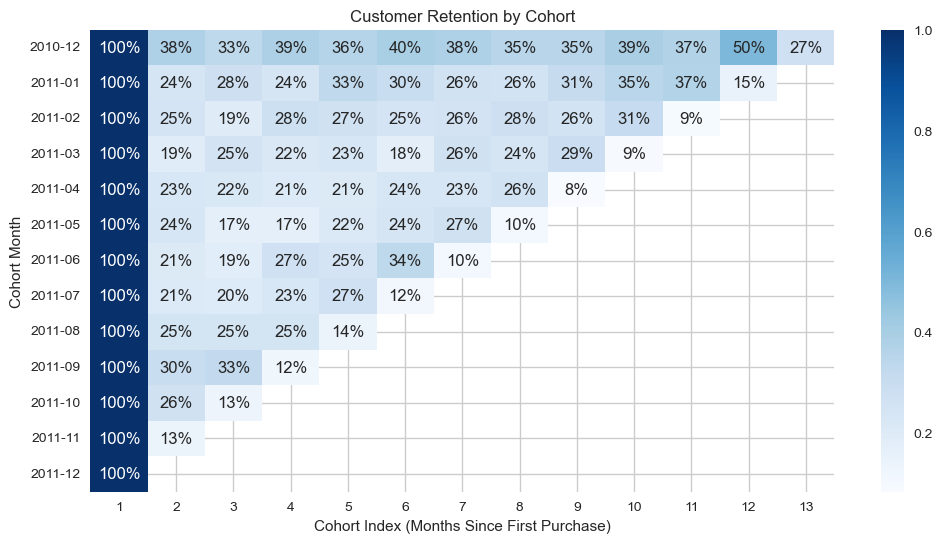

In [312]:

# Convert counts to retention rates (divide by first month size per cohort)
cohort_size = cohort_pivot.iloc[:,0]
retention = cohort_pivot.divide(cohort_size, axis=0)
retention

# 4. Plot the heatmap
plt.figure(figsize=(12,6))
sns.heatmap(
    retention, 
    annot=True, 
    fmt=".0%", 
    cmap="Blues", 
    cbar=True
)

plt.title('Customer Retention by Cohort')
plt.ylabel('Cohort Month')
plt.xlabel('Cohort Index (Months Since First Purchase)')
plt.show()


In [313]:
# keep only numeric columns for stats
numeric_df = df.select_dtypes(include=['number'])

descriptive = pd.DataFrame({
    "Mean": numeric_df.mean(),
    "Median": numeric_df.median(),
    "Mode": numeric_df.mode().iloc[0],
    "Range": numeric_df.max() - numeric_df.min(),
    "Variance": numeric_df.var(),
    "Std Dev": numeric_df.std(),
    "Skewness": numeric_df.skew(),
    "Kurtosis": numeric_df.kurt()
})

descriptive

,Mean,Median,Mode,Range,Variance,Std Dev,Skewness,Kurtosis
Quantity,50.478471,50.00,72.00,99.0,8.336456e+02,28.872921,0.001222,-1.202825
UnitPrice,50.477654,50.43,11.41,99.0,8.164206e+02,28.573075,0.002824,-1.198754
Revenue,2550.053514,1914.87,158.40,9998.0,4.890405e+06,2211.425935,0.963773,0.135265
cohortIndex,5.185088,4.00,1.00,12.0,1.489553e+01,3.859473,0.435253,-1.173100


In [314]:
cat_col = df.select_dtypes(include = 'object')
cat_col.describe()

,InvoiceNo,CustomerID,StockCode,Description,Country
count,406829,406829,406829,406829,406829
unique,22190,4372,9000,10,28
top,576339,17841,SC2014,Jewelry,Nigeria
freq,542,7983,79,41017,14714


In [315]:
#joining the describetive analysis for both object and numerical colums for proper overview
new_analysis = pd.concat([descriptive, cat_col], axis=1)
new_analysis

,Mean,Median,Mode,Range,Variance,Std Dev,Skewness,Kurtosis,InvoiceNo,CustomerID,StockCode,Description,Country
Quantity,50.478471,50.00,72.00,99.0,8.336456e+02,28.872921,0.001222,-1.202825,NaN,NaN,NaN,NaN,NaN
UnitPrice,50.477654,50.43,11.41,99.0,8.164206e+02,28.573075,0.002824,-1.198754,NaN,NaN,NaN,NaN,NaN
Revenue,2550.053514,1914.87,158.40,9998.0,4.890405e+06,2211.425935,0.963773,0.135265,NaN,NaN,NaN,NaN,NaN
cohortIndex,5.185088,4.00,1.00,12.0,1.489553e+01,3.859473,0.435253,-1.173100,NaN,NaN,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,536365,17850,SC1734,Electronics,Egypt
...,...,...,...,...,...,...,...,...,...,...,...,...,...
406824,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680,SC5440,Furniture,Mozambique
406825,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680,SC3576,Cloths,Tunisia
406826,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680,SC5283,Furniture,Somalia
406827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,581587,12680,SC1099,Cosmetics,Senegal


In [316]:
#recency frequency and monetry
#Timedelda(days=1) is to increase the date by 1
reference_date = df['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date


Timestamp('2011-12-10 12:50:00')

In [317]:
#groupin customerID by aggregating it with invoiceDate, inoiceNo and Revenue for insight extraction
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate' : lambda x:(reference_date- x.max()).days,
    'InvoiceNo' : pd.Series.nunique,
    'Revenue' :'sum'
}).reset_index()
rfm

,CustomerID,InvoiceDate,InvoiceNo,Revenue
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37
...,...,...,...,...
4367,18280,278,1,18907.36
4368,18281,181,1,26009.01
4369,18282,8,3,36010.74
4370,18283,4,16,2008747.62


In [318]:
#creating a nea columns
rfm.columns=['CustomerID','recency_days','frequency','Monetary']
rfm.head()

,CustomerID,recency_days,frequency,Monetary
0,12346,326,2,5342.40
1,12347,2,7,431501.00
2,12348,75,4,82378.47
3,12349,19,1,176075.12
4,12350,310,1,48173.37


In [319]:
#statistic Analysis
rfm.describe()

,recency_days,frequency,Monetary
count,4372.000000,4372.000000,4.372000e+03
mean,92.047118,5.075480,2.372909e+05
std,100.765435,9.338754,5.944603e+05
min,1.000000,1.000000,1.736000e+01
25%,17.000000,1.000000,4.350893e+04
50%,50.000000,3.000000,1.066925e+05
75%,143.000000,5.000000,2.599154e+05
max,374.000000,248.000000,2.038383e+07


In [320]:
#checking the columns
rfm.columns

Index(['CustomerID', 'recency_days', 'frequency', 'Monetary'], dtype='object')

In [321]:
#coping the new created column for futher insight and analysis

x =rfm[['recency_days', 'frequency', 'Monetary']].copy()

In [351]:
#normalizing the range in our columns so they can be of the same range

ss = StandardScaler()
X_scaled = ss.fit_transform(x)
X_scaled

array([[ 2.32202285, -0.32936215, -0.39022789],
       [-0.89373323,  0.20610242,  0.32673724],
       [-0.1691956 , -0.11517632, -0.26062315],
       ...,
       [-0.83418219, -0.22226923, -0.33863177],
       [-0.87388289,  1.16993863,  2.98028181],
       [-0.48680114, -0.22226923, -0.04750002]])

In [352]:
from sklearn.metrics import silhouette_score

In [353]:
#cluster counts from 2 to 11, storing both inertia and silhouette scores and the same times appending them at each time of iteration

inertia =[]
s_scores = []
K_range = range(2,12)

for k in K_range:
    km = KMeans(n_clusters = k, random_state = 42, n_init=10)
    labels = km.fit_predict(X_scaled)
    inertia.append(km.inertia_)
    s_scores.append(silhouette_score(X_scaled,labels))

inertia

[9046.078478815767,
 5336.966767083277,
 3523.5663091538936,
 2838.880253520756,
 2324.062624515257,
 1879.2757377823084,
 1646.4006901120965,
 1489.4757907270555,
 1323.1187606006401,
 1182.006554736192]

Text(0, 0.5, 'Inertia')

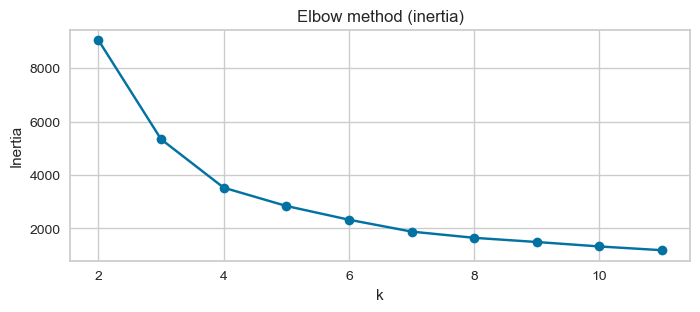

In [354]:
#plot for Elbow Curve

plt.figure(figsize=(8,3))
plt.plot(K_range,inertia,marker='o')
plt.title('Elbow method (inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

Text(0, 0.5, 'Inertia')

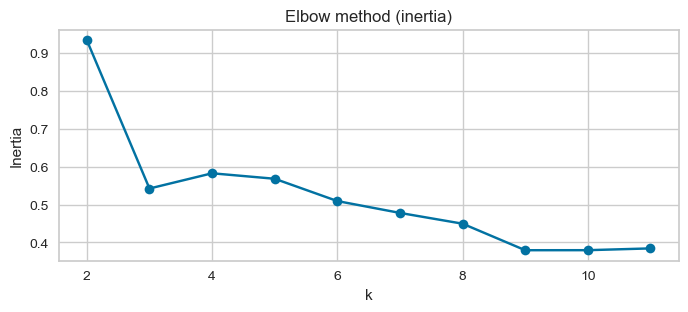

In [355]:
#plot for silhouette_score

plt.figure(figsize=(8,3))
plt.plot(K_range,s_scores,marker='o')
plt.title('Elbow method (inertia)')
plt.xlabel('k')
plt.ylabel('Inertia')

In [356]:
pip install yellowbrick

Note: you may need to restart the kernel to use updated packages.


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=9, random_state=42),
                 k=(2, 10))

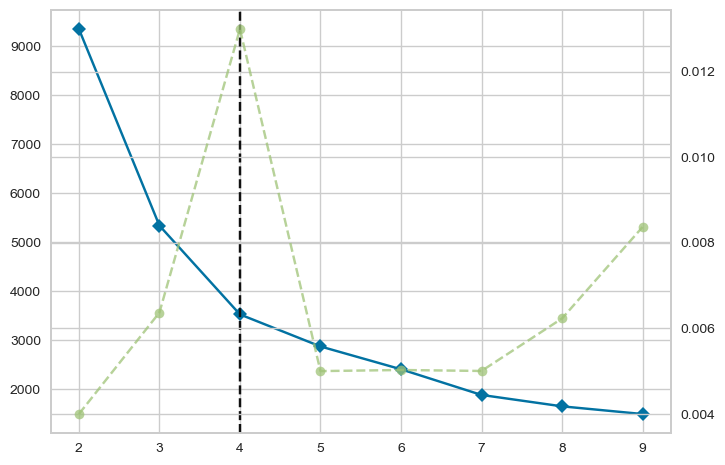

In [357]:
#Yellowbrick  helps you find the “elbow point” automatically.

from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=42)
v=KElbowVisualizer(model,k=(2,10))
v.fit(X_scaled)

In [358]:
#Training our model
final_k = 4
final_model =KMeans(n_clusters = final_k , random_state = 42)
final_model.fit(X_scaled)


KMeans(n_clusters=4, random_state=42)

In [359]:
rfm.head()

,CustomerID,recency_days,frequency,Monetary,clusters
0,12346,326,2,5342.40,2
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,1
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,2


In [360]:
#creating cluster column
rfm["clusters"] = final_model.labels_
rfm.head()

,CustomerID,recency_days,frequency,Monetary,clusters
0,12346,326,2,5342.40,1
1,12347,2,7,431501.00,0
2,12348,75,4,82378.47,0
3,12349,19,1,176075.12,0
4,12350,310,1,48173.37,1


In [361]:
#profiling our cluster to corelate to customer number in each cluster

cluster_profile = rfm.groupby('clusters').agg({
    'recency_days': 'mean',
    'frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'
}).rename(columns={'CustomerID': "NumCustomer"}).round(1)

print(cluster_profile)

          recency_days  frequency    Monetary  NumCustomer
clusters                                                  
0                 43.4        4.2    195421.0         3023
1                248.9        1.8     69191.6         1077
2                  1.7      153.5  12345024.6            6
3                 11.8       25.3   1120633.6          266


In [362]:
#calling the above object
cluster_profile

,recency_days,frequency,Monetary,NumCustomer
clusters,,,,
0,43.4,4.2,195421.0,3023
1,248.9,1.8,69191.6,1077
2,1.7,153.5,12345024.6,6
3,11.8,25.3,1120633.6,266


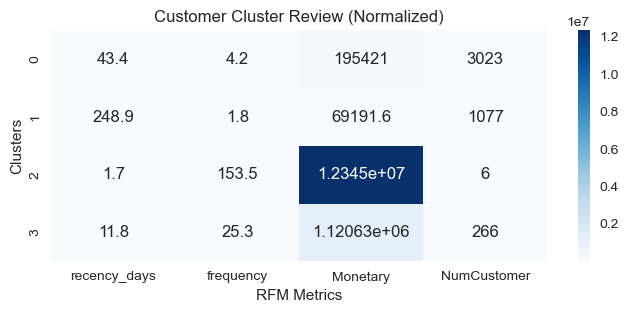

In [363]:
#heatmap visualization for proper understanding

plt.figure(figsize=(8,3))
sns.heatmap(cluster_profile, cmap="Blues", annot=True, cbar=True, fmt="g")
plt.title("Customer Cluster Review (Normalized)")
plt.ylabel("Clusters")
plt.xlabel("RFM Metrics")
plt.show()

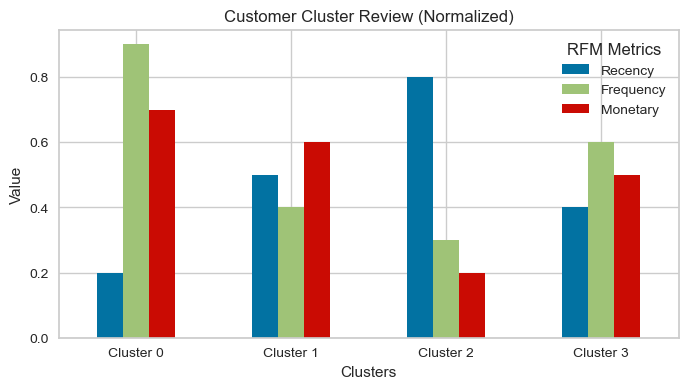

In [364]:
import matplotlib.pyplot as plt
import pandas as pd

import matplotlib.pyplot as plt
import pandas as pd

# Correct sample cluster profile
cluster_profile = pd.DataFrame({
    'Recency': [0.2, 0.5, 0.8, 0.4],
    'Frequency': [0.9, 0.4, 0.3, 0.6],
    'Monetary': [0.7, 0.6, 0.2, 0.5],
    'Cluster_Size': [3023, 1077, 6, 266]  # Number of customers per cluster
}, index=['Cluster 0','Cluster 1', 'Cluster 2', 'Cluster 3'])

# Plot only RFM metrics
cluster_profile[['Recency','Frequency','Monetary']].plot(kind='bar', figsize=(8,4))
plt.title("Customer Cluster Review (Normalized)")
plt.ylabel("Value")
plt.xlabel("Clusters")
plt.xticks(rotation=0)
plt.legend(title="RFM Metrics")
plt.show()



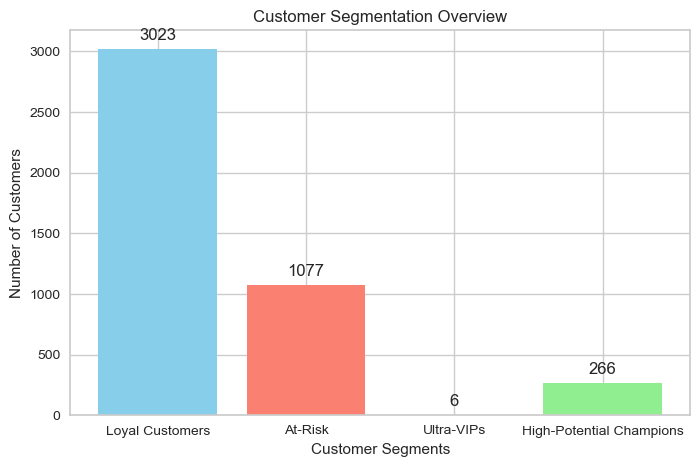

In [365]:
import matplotlib.pyplot as plt

# Data
segments = ['Loyal Customers', 'At-Risk', 'Ultra-VIPs', 'High-Potential Champions']
num_customers = [3023, 1077, 6, 266]

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(segments, num_customers, color=['skyblue', 'salmon', 'gold', 'lightgreen'])
plt.title('Customer Segmentation Overview')
plt.ylabel('Number of Customers')
plt.xlabel('Customer Segments')

# Annotate bars with counts
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 50, f'{height}', ha='center', va='bottom')

plt.show()


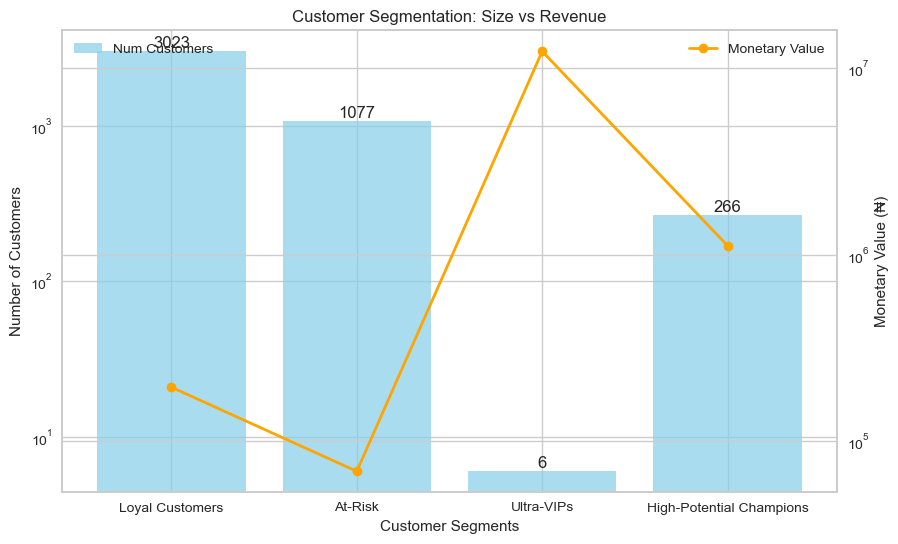

In [366]:
import matplotlib.pyplot as plt

# Data
clusters = ['Loyal Customers', 'At-Risk', 'Ultra-VIPs', 'High-Potential Champions']
num_customers = [3023, 1077, 6, 266]
monetary = [195421, 69191, 12345024, 1120633]
frequency = [4.2, 1.8, 153.5, 25.3]
recency = [43.4, 248.9, 1.7, 11.8]

# Figure setup
fig, ax1 = plt.subplots(figsize=(10,6))

# Bar plot: Number of Customers
bars = ax1.bar(clusters, num_customers, color='skyblue', alpha=0.7, label='Num Customers')
ax1.set_ylabel('Number of Customers')
ax1.set_xlabel('Customer Segments')
ax1.set_yscale('log')  # Log scale for better comparison

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom')

# Line plot: Monetary Value
ax2 = ax1.twinx()
ax2.plot(clusters, monetary, color='orange', marker='o', linewidth=2, label='Monetary Value')
ax2.set_ylabel('Monetary Value (₦)')
ax2.set_yscale('log')  # Log scale due to large difference

# Title and legends
plt.title('Customer Segmentation: Size vs Revenue')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()


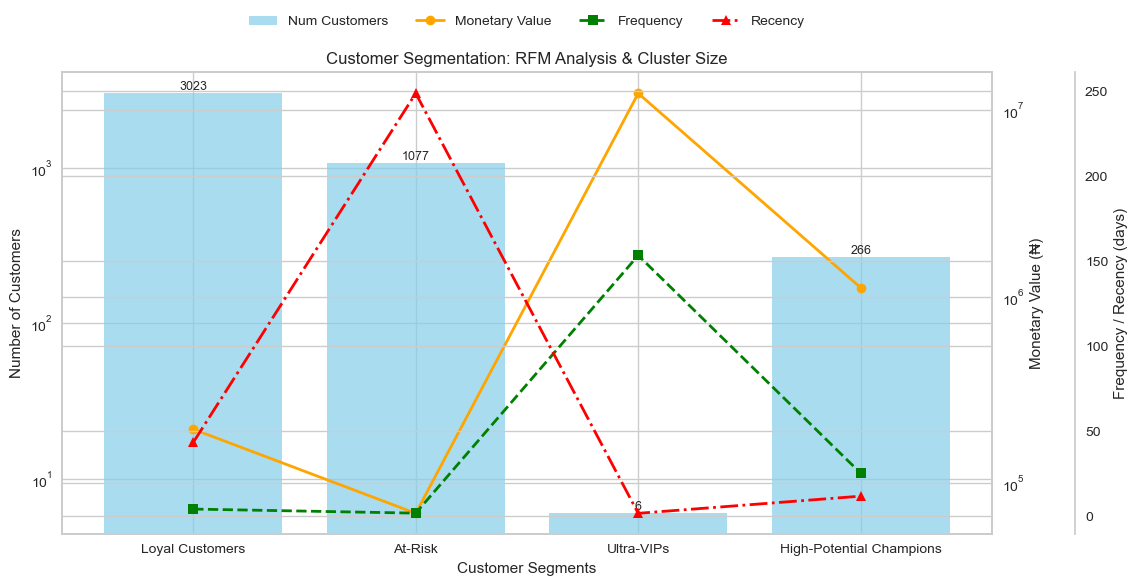

In [367]:
import matplotlib.pyplot as plt

# Data
clusters = ['Loyal Customers', 'At-Risk', 'Ultra-VIPs', 'High-Potential Champions']
num_customers = [3023, 1077, 6, 266]
monetary = [195421, 69191, 12345024, 1120633]
frequency = [4.2, 1.8, 153.5, 25.3]
recency = [43.4, 248.9, 1.7, 11.8]

# Figure setup
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot: Number of Customers
bars = ax1.bar(clusters, num_customers, color='skyblue', alpha=0.7, label='Num Customers')
ax1.set_ylabel('Number of Customers')
ax1.set_yscale('log')
ax1.set_xlabel('Customer Segments')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Secondary y-axis: Monetary value
ax2 = ax1.twinx()
ax2.plot(clusters, monetary, color='orange', marker='o', linewidth=2, label='Monetary Value')
ax2.set_ylabel('Monetary Value (₦)')
ax2.set_yscale('log')

# Additional y-axis for Frequency and Recency
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move the axis
ax3.plot(clusters, frequency, color='green', marker='s', linestyle='--', linewidth=2, label='Frequency')
ax3.plot(clusters, recency, color='red', marker='^', linestyle='-.', linewidth=2, label='Recency')
ax3.set_ylabel('Frequency / Recency (days)')

# Legends
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.title('Customer Segmentation: RFM Analysis & Cluster Size')
plt.show()


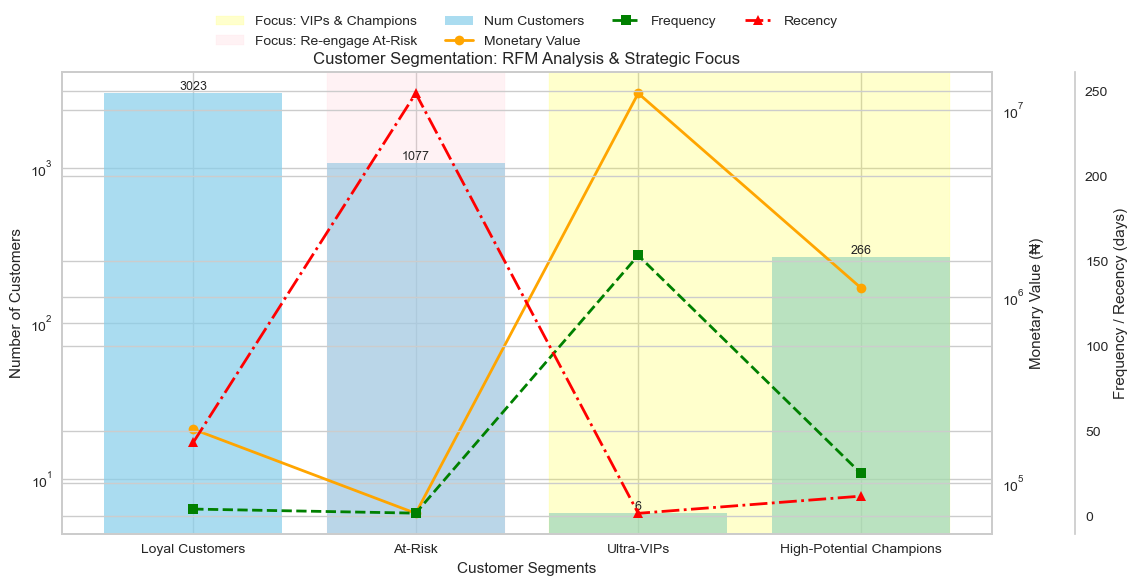

In [368]:
import matplotlib.pyplot as plt

# Data
clusters = ['Loyal Customers', 'At-Risk', 'Ultra-VIPs', 'High-Potential Champions']
num_customers = [3023, 1077, 6, 266]
monetary = [195421, 69191, 12345024, 1120633]
frequency = [4.2, 1.8, 153.5, 25.3]
recency = [43.4, 248.9, 1.7, 11.8]

# Figure setup
fig, ax1 = plt.subplots(figsize=(12,6))

# Bar plot: Number of Customers
bars = ax1.bar(clusters, num_customers, color='skyblue', alpha=0.7, label='Num Customers')
ax1.set_ylabel('Number of Customers')
ax1.set_yscale('log')
ax1.set_xlabel('Customer Segments')

# Annotate bars
for bar in bars:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2, height, f'{int(height)}', ha='center', va='bottom', fontsize=9)

# Secondary y-axis: Monetary value
ax2 = ax1.twinx()
ax2.plot(clusters, monetary, color='orange', marker='o', linewidth=2, label='Monetary Value')
ax2.set_ylabel('Monetary Value (₦)')
ax2.set_yscale('log')

# Additional y-axis for Frequency and Recency
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))  # move the axis
ax3.plot(clusters, frequency, color='green', marker='s', linestyle='--', linewidth=2, label='Frequency')
ax3.plot(clusters, recency, color='red', marker='^', linestyle='-.', linewidth=2, label='Recency')
ax3.set_ylabel('Frequency / Recency (days)')

# Highlight strategic focus areas
ax1.axvspan(2-0.4, 3+0.4, color='yellow', alpha=0.2, label='Focus: VIPs & Champions')  # Ultra-VIPs & Champions
ax1.axvspan(1-0.4, 1+0.4, color='pink', alpha=0.2, label='Focus: Re-engage At-Risk')   # At-Risk

# Legends
lines_labels = [ax1.get_legend_handles_labels(), ax2.get_legend_handles_labels(), ax3.get_legend_handles_labels()]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]
ax1.legend(lines, labels, loc='upper center', bbox_to_anchor=(0.5, 1.15), ncol=4)

plt.title('Customer Segmentation: RFM Analysis & Strategic Focus')
plt.show()
